# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [29]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


## Visualize Dataset
This is the same code from Assignment 1

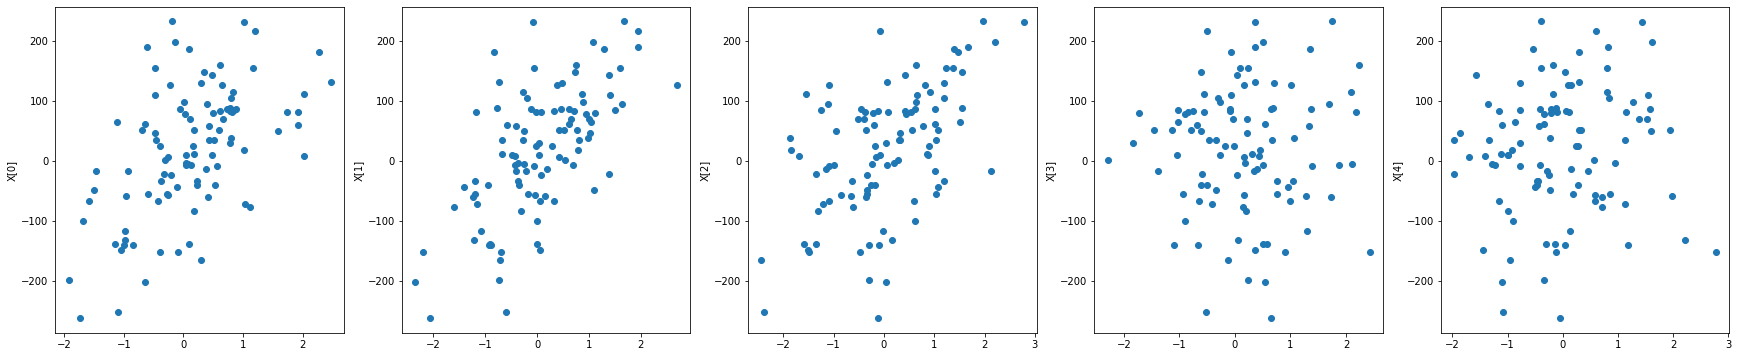

In [30]:
import matplotlib.pyplot as plt
import numpy as np

figure, axis = plt.subplots(1,5, figsize=(30,6))
for i in range(5):
  axis[i].scatter(X[:,i],y)
  m, b = np.polyfit(X[:,i], y, 1)
#   axis[i].plot(X[:,i],m*X[:,i]+b, color = "red")
  axis[i].set(ylabel = "X[{}]".format(i))


# Your code here

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [31]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(np.array(X_train))


In [40]:

# def build_model(normalizer):
model = keras.Sequential([
    layers.Dense(5,activation='relu', input_shape=[5]),
    layers.Dense(5,activation='relu'),
    layers.Dense(1,activation='relu')
])

model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(0.001), metrics=[tf.keras.metrics.MeanSquaredError()])

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100)

model.summary()

# Your code here
# history.history

Epoch 1/100
2/2 [==============================] - 0s 125ms/step - loss: 12550.8145 - mean_squared_error: 12550.8145 - val_loss: 7107.4004 - val_mean_squared_error: 7107.4004
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 12489.0449 - mean_squared_error: 12489.0449 - val_loss: 7000.7349 - val_mean_squared_error: 7000.7349
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 12352.7422 - mean_squared_error: 12352.7422 - val_loss: 6722.9185 - val_mean_squared_error: 6722.9185
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 11977.8125 - mean_squared_error: 11977.8125 - val_loss: 5785.0254 - val_mean_squared_error: 5785.0254
Epoch 5/100
2/2 [==============================] - 0s 31ms/step - loss: 10597.5449 - mean_squared_error: 10597.5449 - val_loss: 2769.6055 - val_mean_squared_error: 2769.6055
Epoch 6/100
2/2 [==============================] - 0s 47ms/step - loss: 7468.4775 - mean_squared_error: 7468.4775 - val_loss: 182

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

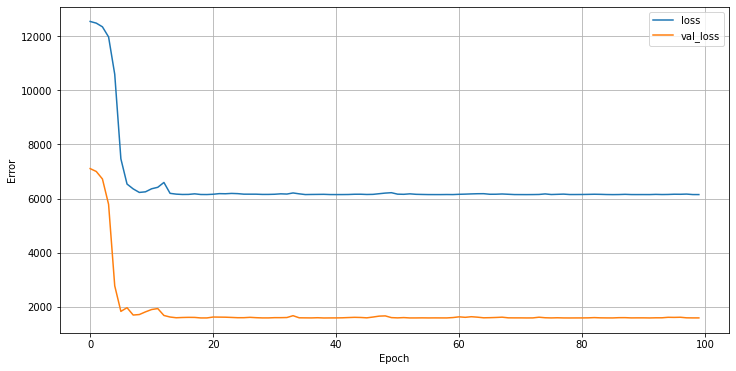

In [41]:
# Your code here

# def plot_loss(history):
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [43]:
pred = model.predict(X_test)

1/1 [==============================] - 0s 23ms/step


In [44]:
# Insert the function for R2 Score

from sklearn.metrics import r2_score

def mean_squared_error(y_true, y_pred):
       # return the mean squared error
       y2 = np.array([[item] for item in y_true])
       return np.sum(np.square(y2-y_pred))/y_true.size

# score = r2_score(y_test,pred)
# score

mse = mean_squared_error(y_test,pred) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_test,pred) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: 3248.56784873353
Accuracy: 0.6806142554740351


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

In [47]:
# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

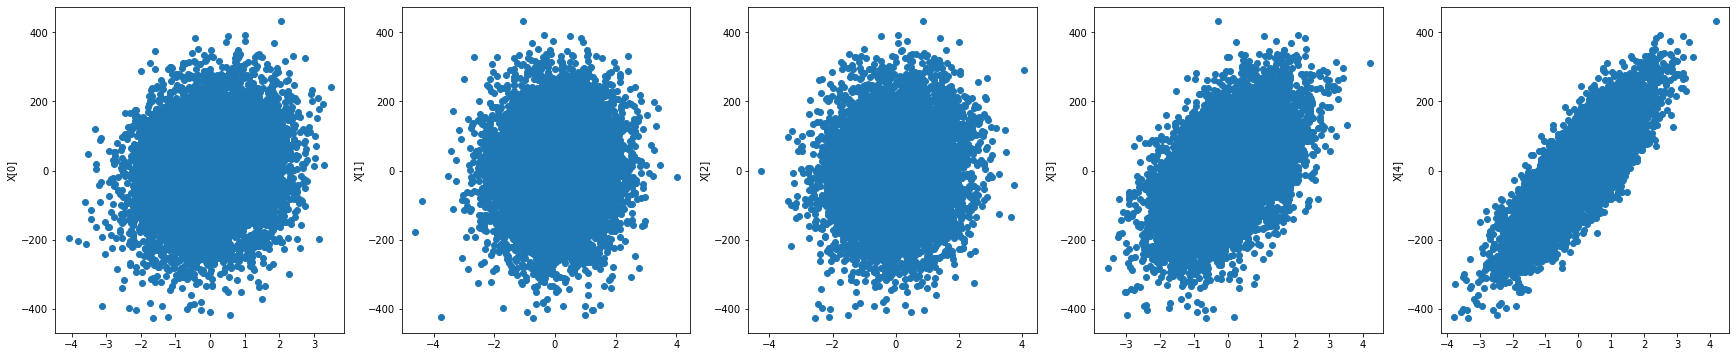

In [48]:
figure, axis = plt.subplots(1,5, figsize=(30,6))
for i in range(5):
  axis[i].scatter(X[:,i],y)
  m, b = np.polyfit(X[:,i], y, 1)
#   axis[i].plot(X[:,i],m*X[:,i]+b, color = "red")
  axis[i].set(ylabel = "X[{}]".format(i))


In [61]:
# Your code here



model2 = keras.Sequential([
    layers.Dense(10,activation='relu', input_shape=[5]),
    layers.BatchNormalization(),
    # layers.Dense(5, activation='relu'),
    # layers.Dense(5, activation='relu'),
    layers.Dense(1,activation='relu')
])

model2.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

history2 = model2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=60,
    verbose=1)

model2.summary()

Epoch 1/60
200/200 [==============================] - 1s 3ms/step - loss: 13480.9385 - mean_squared_error: 13480.9385 - val_loss: 13856.3623 - val_mean_squared_error: 13856.3623
Epoch 2/60
200/200 [==============================] - 0s 2ms/step - loss: 12880.9014 - mean_squared_error: 12880.9014 - val_loss: 12925.0146 - val_mean_squared_error: 12925.0146
Epoch 3/60
200/200 [==============================] - 0s 2ms/step - loss: 11811.8516 - mean_squared_error: 11811.8516 - val_loss: 11753.6865 - val_mean_squared_error: 11753.6865
Epoch 4/60
200/200 [==============================] - 0s 2ms/step - loss: 10661.5215 - mean_squared_error: 10661.5215 - val_loss: 10468.7549 - val_mean_squared_error: 10468.7549
Epoch 5/60
200/200 [==============================] - 0s 2ms/step - loss: 9650.4258 - mean_squared_error: 9650.4258 - val_loss: 9291.5820 - val_mean_squared_error: 9291.5820
Epoch 6/60
200/200 [==============================] - 0s 2ms/step - loss: 8812.5693 - mean_squared_error: 8812.569

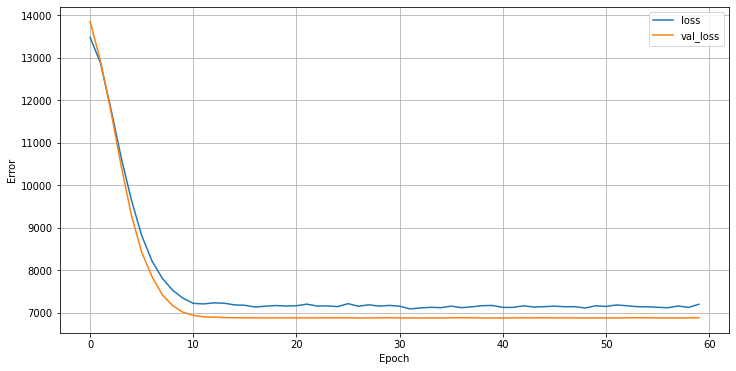

In [62]:
plt.figure(figsize=(12,6))
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [63]:
pred2 = model2.predict(X_test)

# Insert the function for R2 Score

from sklearn.metrics import r2_score

def mean_squared_error(y_true, y_pred):
       # return the mean squared error
       y2 = np.array([[item] for item in y_true])
       return np.sum(np.square(y2-y_pred))/y_true.size

mse = mean_squared_error(y_test,pred2) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_test,pred2) # Pass appropriate parts of dataset
print("Accuracy:", accu)

63/63 [==============================] - 0s 1ms/step
MSE: 7091.710262866173
Accuracy: 0.49134205058868197
